# Principal Component Analysis (PCA)
Demonstrate what PCA is using Gaussian distributions

In [1]:
import numpy as np
import numpy.random as rand

Make some data which is gaussian distributed with some covariance terms.

In [2]:
np.random.seed(0)
a = np.random.multivariate_normal([0,0], [[.5, .3],[.3, .5]], 10000)
a

array([[-1.24222549, -0.98914384],
       [-1.3276409 ,  0.0896244 ],
       [-0.87210498, -1.49018978],
       ...,
       [ 0.55476837,  0.72658234],
       [ 0.0870429 ,  0.05082897],
       [ 0.77298429,  0.56646957]])

Our data should have the covaraince given below. This will make the plot look like a skewed oval.

In [3]:
np.cov(a.transpose())

array([[0.49513608, 0.29878486],
       [0.29878486, 0.49123394]])

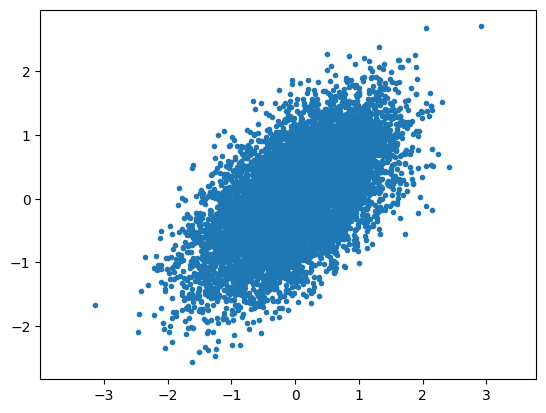

In [4]:
import matplotlib.pyplot as plt
plt.plot(a[:,0],a[:,1],'.')
plt.axis('equal')
plt.show()

Now use PCA to align maximum variance with the first (x) axis. In multiple dimensions will also align 2nd maximum variance to second (y) axis and so forth.

In [5]:
from sklearn import decomposition

In [6]:
pca = decomposition.PCA(n_components=2)
pca.fit(a)

PCA(n_components=2)

Now lets look at the components that are used to transform our data.

In [7]:
pca.components_

array([[ 0.70941169,  0.70479434],
       [ 0.70479434, -0.70941169]])

This is like a -45 degree rotation (and a flip about the x axis for some reason).

For example this is a direction cosine matrix to do such a rotation

In [8]:
angle = -np.pi/4
np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)] ])

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Fit solved for the rotation matrix to apply to orient this set of data with the x,y axes. Now we transform with that matrix to reorient our data.

In [9]:
b = pca.transform(a)
b

array([[-1.58776708, -0.17241284],
       [-0.88805203, -0.99790394],
       [-1.67833361,  0.44389384],
       ...,
       [ 0.89627546, -0.12305795],
       [ 0.08819839,  0.02667913],
       [ 0.93823381,  0.14432527]])

The transformation changed the covariance matrix to be (almost) diagonal. The off diagonal terms are very small and could be considered zero.

In [10]:
np.cov(b.transpose())

array([[7.91976239e-01, 2.06327826e-16],
       [2.06327826e-16, 1.94393783e-01]])

Now our plot should look like an ellipse with the major axis aligned to the x axis. 

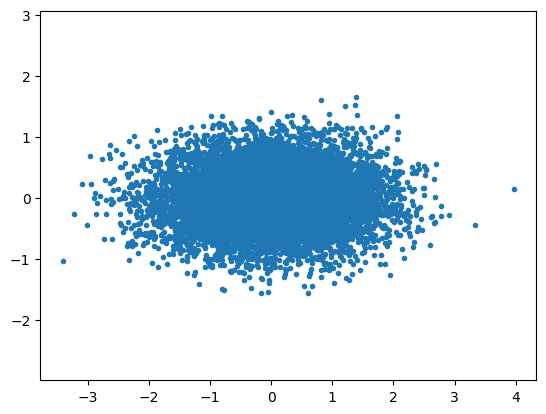

In [11]:
plt.plot(b[:,0],b[:,1],'.')
plt.axis('equal')
plt.show()

Additionally a PCA transform can whiten data which will force the covariance matrix to have ones in the diagonal.

In [12]:
pca_2 = decomposition.PCA(n_components=2, whiten=True)
pca_2.fit(a)
c = pca_2.transform(a)
c

array([[-1.78414735, -0.39104651],
       [-0.99788923, -2.26332829],
       [-1.88591544,  1.00678778],
       ...,
       [ 1.00712976, -0.27910556],
       [ 0.09910706,  0.06051046],
       [ 1.05427766,  0.32734159]])

Now the covariance matrix should be (almost) the identity matrix.

In [13]:
np.cov(c.transpose())

array([[1.00000000e+00, 5.18104078e-16],
       [5.18104078e-16, 1.00000000e+00]])

Now plot the data and it should look like a circle.

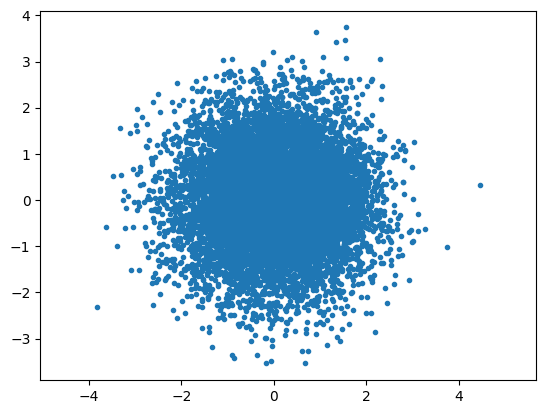

In [14]:
plt.plot(c[:,0],c[:,1],'.')
plt.axis('equal')
plt.show()